# Air Quality Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/air_quality_data.csv')
df = df[df['room'].isin(['Fuoco','Affrescata','Modulare'])]
variables = ['pm10','score','temp_f',
           'humid','co2','voc','pm25','noise','light']

In [3]:
df.shape

(26222, 11)

In [4]:
# Create date time variables 
df['date_hour'] = pd.to_datetime(df['date_hour'],utc = True)
df['date_hour'] = df['date_hour'].dt.tz_convert('Europe/Rome')
df['date'] = df['date_hour'].dt.date
df['hour'] = df['date_hour'].dt.hour
df['day'] = df['date_hour'].dt.day_name()

## Data collection
* Data from October 13th to November 12th.
* The data comes from Fouco, Modulare and Affrescata rooms. 

**Note:** I also downloaded data from Canteen and Proteggo, but they have very few observations, so I excluded from the analysis. I need to verify whether I made a mistake when exporting the data.

In [5]:
print(df['date'].min())
print(df['date'].max())

2024-10-13
2024-11-12


In [6]:
df.groupby('room').size()

room
Affrescata    8743
Fuoco         8742
Modulare      8737
dtype: int64

## Correlation matrix
* There is a high negative correlation of `score` with `co2` and `humid`.  
* The `score` is also negatively correlated with `voc` (volatile organic compounds), `noise` and `pmXX`. The higher the score, the better the air qualilty.  
* I thought that the score would be correlate with temperature, but it is not.  
* The variables `pm25` and `pm10`, unsurprisingly, have a perfect correlation.
* Even though `co2` and `humid` are relatively correlated to `temp_f`, the latter is not correlated with the `score`. I think the effect of temperature is cancelled. On one way, the higher the temperature, the higher the CO2, and the lower the air quality. On the other way, the lower the temperature, the higher the humidity, and the lower the air quality. Therefore, either way it afects the score negatively. This is my assumption.

<Axes: >

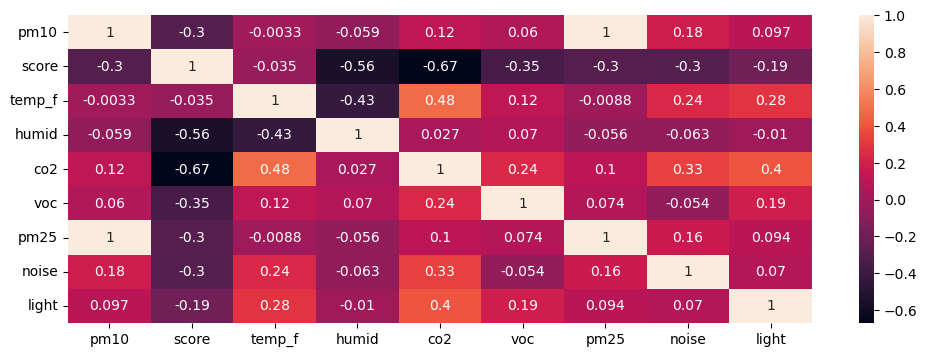

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(df[variables].corr(), annot = True)

## Analysis by hour
* When filtering data to weekdays, the score decreases and the CO2 increases during class hours (9:00 am - 6:00 pm), as expected.  
* The air quality is lower at noon.
* Surprisingly, the median score at 1 am is not better than at 5:00 pm.

In [8]:
df_classhours = df[(df['hour']>=9) & (df['hour']<=18)]
df_weekdays = df[df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
df_all_filters = df[(df['hour']>=9) & (df['hour']<=18) & 
                    (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))]
df_daily = df_classhours.groupby(['room','date'])[variables].mean().reset_index()

Text(0.5, 1.0, 'Score by hour in weekdays')

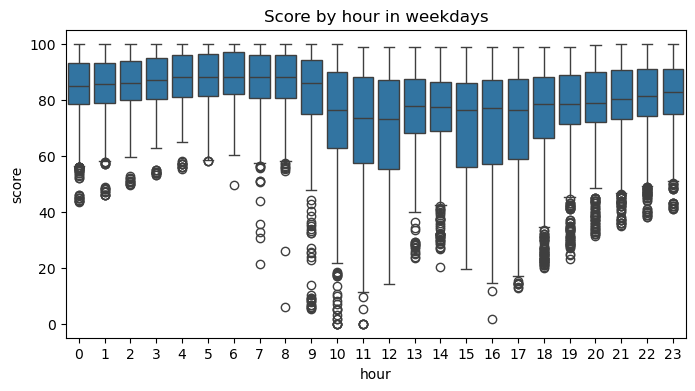

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df_weekdays, x = 'hour', y = 'score')
plt.title('Score by hour in weekdays')

Text(0.5, 1.0, 'CO2 by hour in weekdays')

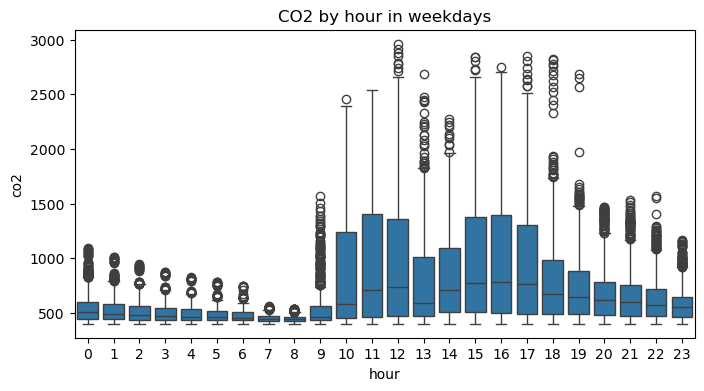

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df_weekdays, x = 'hour', y = 'co2')
plt.title('CO2 by hour in weekdays')

Text(0.5, 1.0, 'Temperature by hour in weekdays')

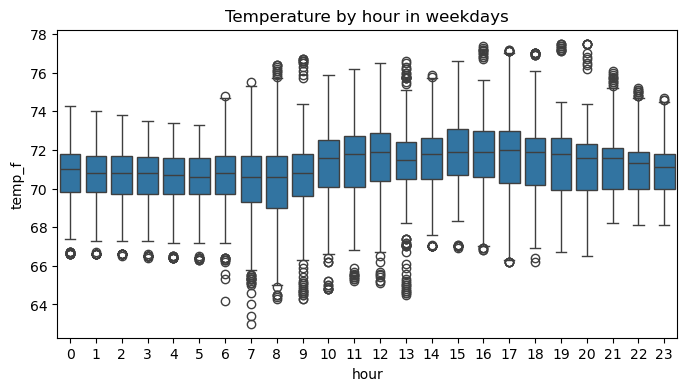

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df_weekdays, x = 'hour', y = 'temp_f')
plt.title('Temperature by hour in weekdays')

## Analysis by weekdays
Note: For the following analysis I filtered the data for class hours (9:00 am to 6:00 pm).  

* Wednesday is the day with the lower average score, followed by Tuesday and Thursday.  
* As expected, Sunday is the day with the highest score. 
* I thought the score would be better on Saturday but it is not.

In [12]:
week_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_classhours.groupby('day')[['score']].mean().loc[week_order,:]

,score
day,
Monday,75.615556
Tuesday,72.058877
Wednesday,69.773472
Thursday,73.689167
Friday,73.409451
Saturday,79.505000
Sunday,90.159200


Text(0.5, 1.0, 'Score by day during class hours')

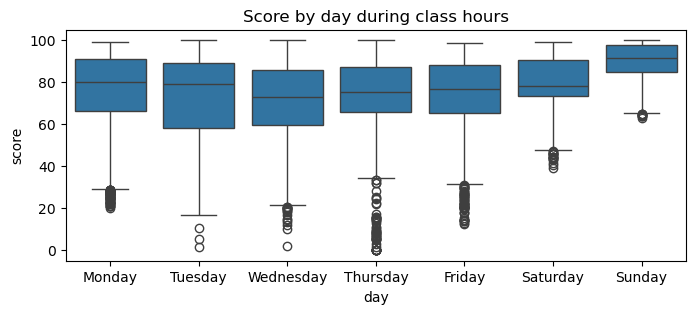

In [13]:
plt.figure(figsize=(8,3))
sns.boxplot(data = df_classhours, x = 'day', y = 'score', 
            order=week_order)
plt.title('Score by day during class hours')

## Analysis by classroom
Note: For the following analysis I filtered the data for class hours (9:00 am to 6:00 pm) and weekdays.  

* Aula modulare is the classroom with the higher average score, then Fouco, and in last place Affrescata.  
* In the lineplot, we observe that Affrescata have the lowest average score consistently. 
* Affrescata has the highest average value CO2, pm25 and humid.
* In variables such as CO2 and pm25 Affrescata is not always the aula with the highest values, but it is consistently the aula with highest humidity.


In [14]:
df_all_filters.groupby('room')[['score','co2','pm25','humid','temp_f']].mean()

,score,co2,pm25,humid,temp_f
room,,,,,
Affrescata,58.740317,956.299729,13.791380,62.318864,70.862543
Fuoco,76.613612,849.400696,10.301083,61.615855,71.394470
Modulare,83.694739,800.826963,9.051296,57.681934,72.318839


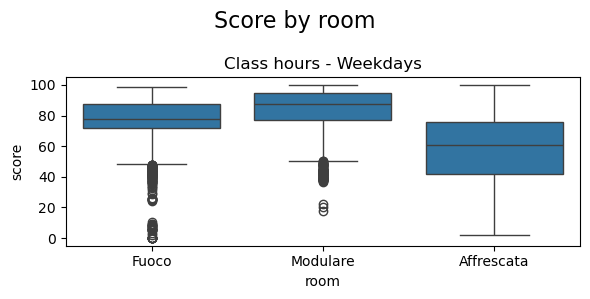

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(data = df_all_filters, x = 'room', y = 'score')
plt.suptitle('Score by room', fontsize = 16)
plt.title('Class hours - Weekdays', fontsize = 12)
plt.tight_layout()

Text(0.5, 1.0, 'Average daily score during class hours')

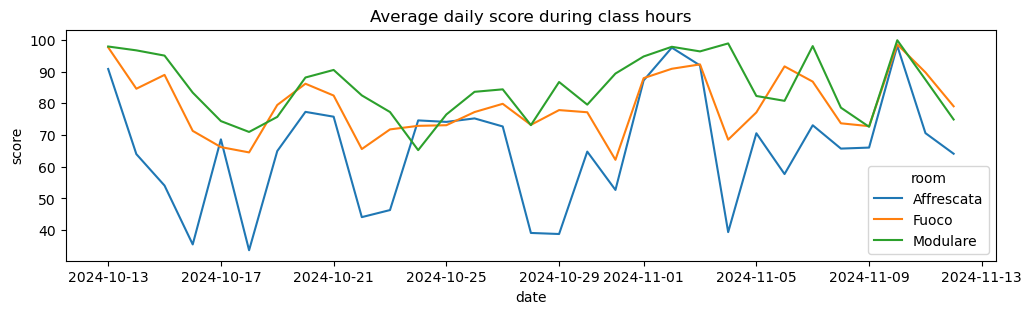

In [16]:
plt.figure(figsize=(12,3))
sns.lineplot(data = df_daily, x = 'date', y = 'score', hue = 'room')
plt.title('Average daily score during class hours')

Text(0.5, 1.0, 'Average daily CO2 during class hours')

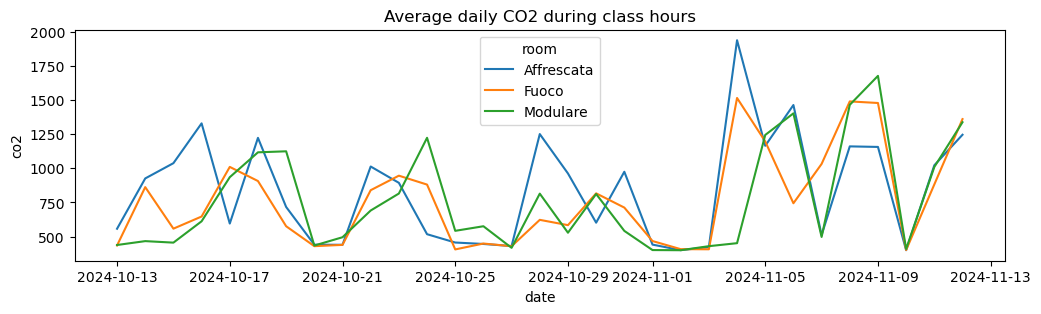

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(data = df_daily, x = 'date', y = 'co2', hue = 'room')
plt.title('Average daily CO2 during class hours')

Text(0.5, 1.0, 'Average daily pm25 during class hours')

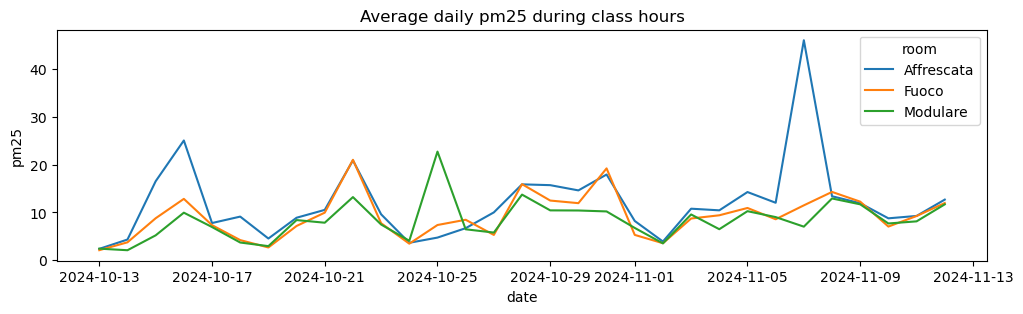

In [18]:
plt.figure(figsize=(12,3))
sns.lineplot(data = df_daily, x = 'date', y = 'pm25', hue = 'room')
plt.title('Average daily pm25 during class hours')

Text(0.5, 1.0, 'Average daily humid during class hours')

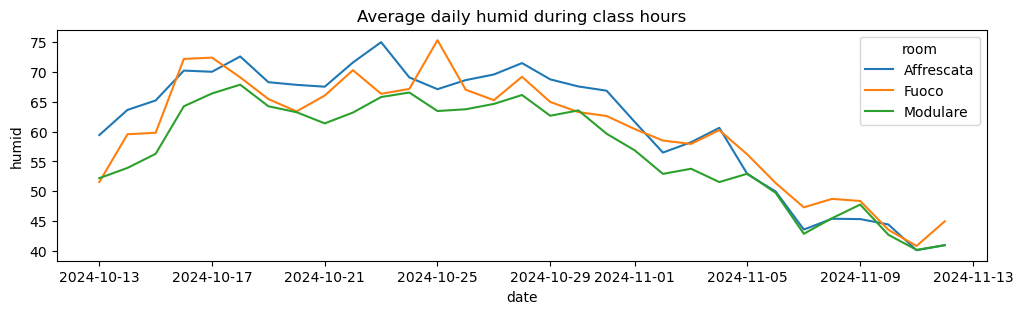

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(data = df_daily, x = 'date', y = 'humid', hue = 'room')
plt.title('Average daily humid during class hours')

## Correlation matrix (after filters)

I calculated again the correlation matrix after filtering to class hours and weekdays, to see if there any changes. But the results are quite consistent with the previous ones.

<Axes: >

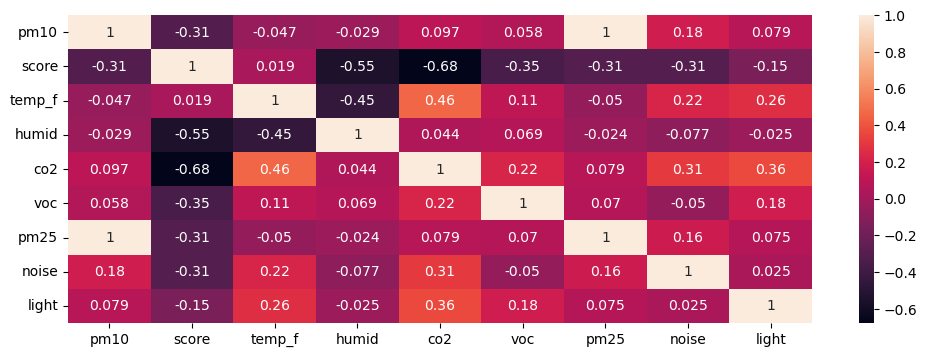

In [20]:
plt.figure(figsize=(12,4))
sns.heatmap(df_weekdays[variables].corr(), annot = True)

The plot below is another way to observe the relation between variables.

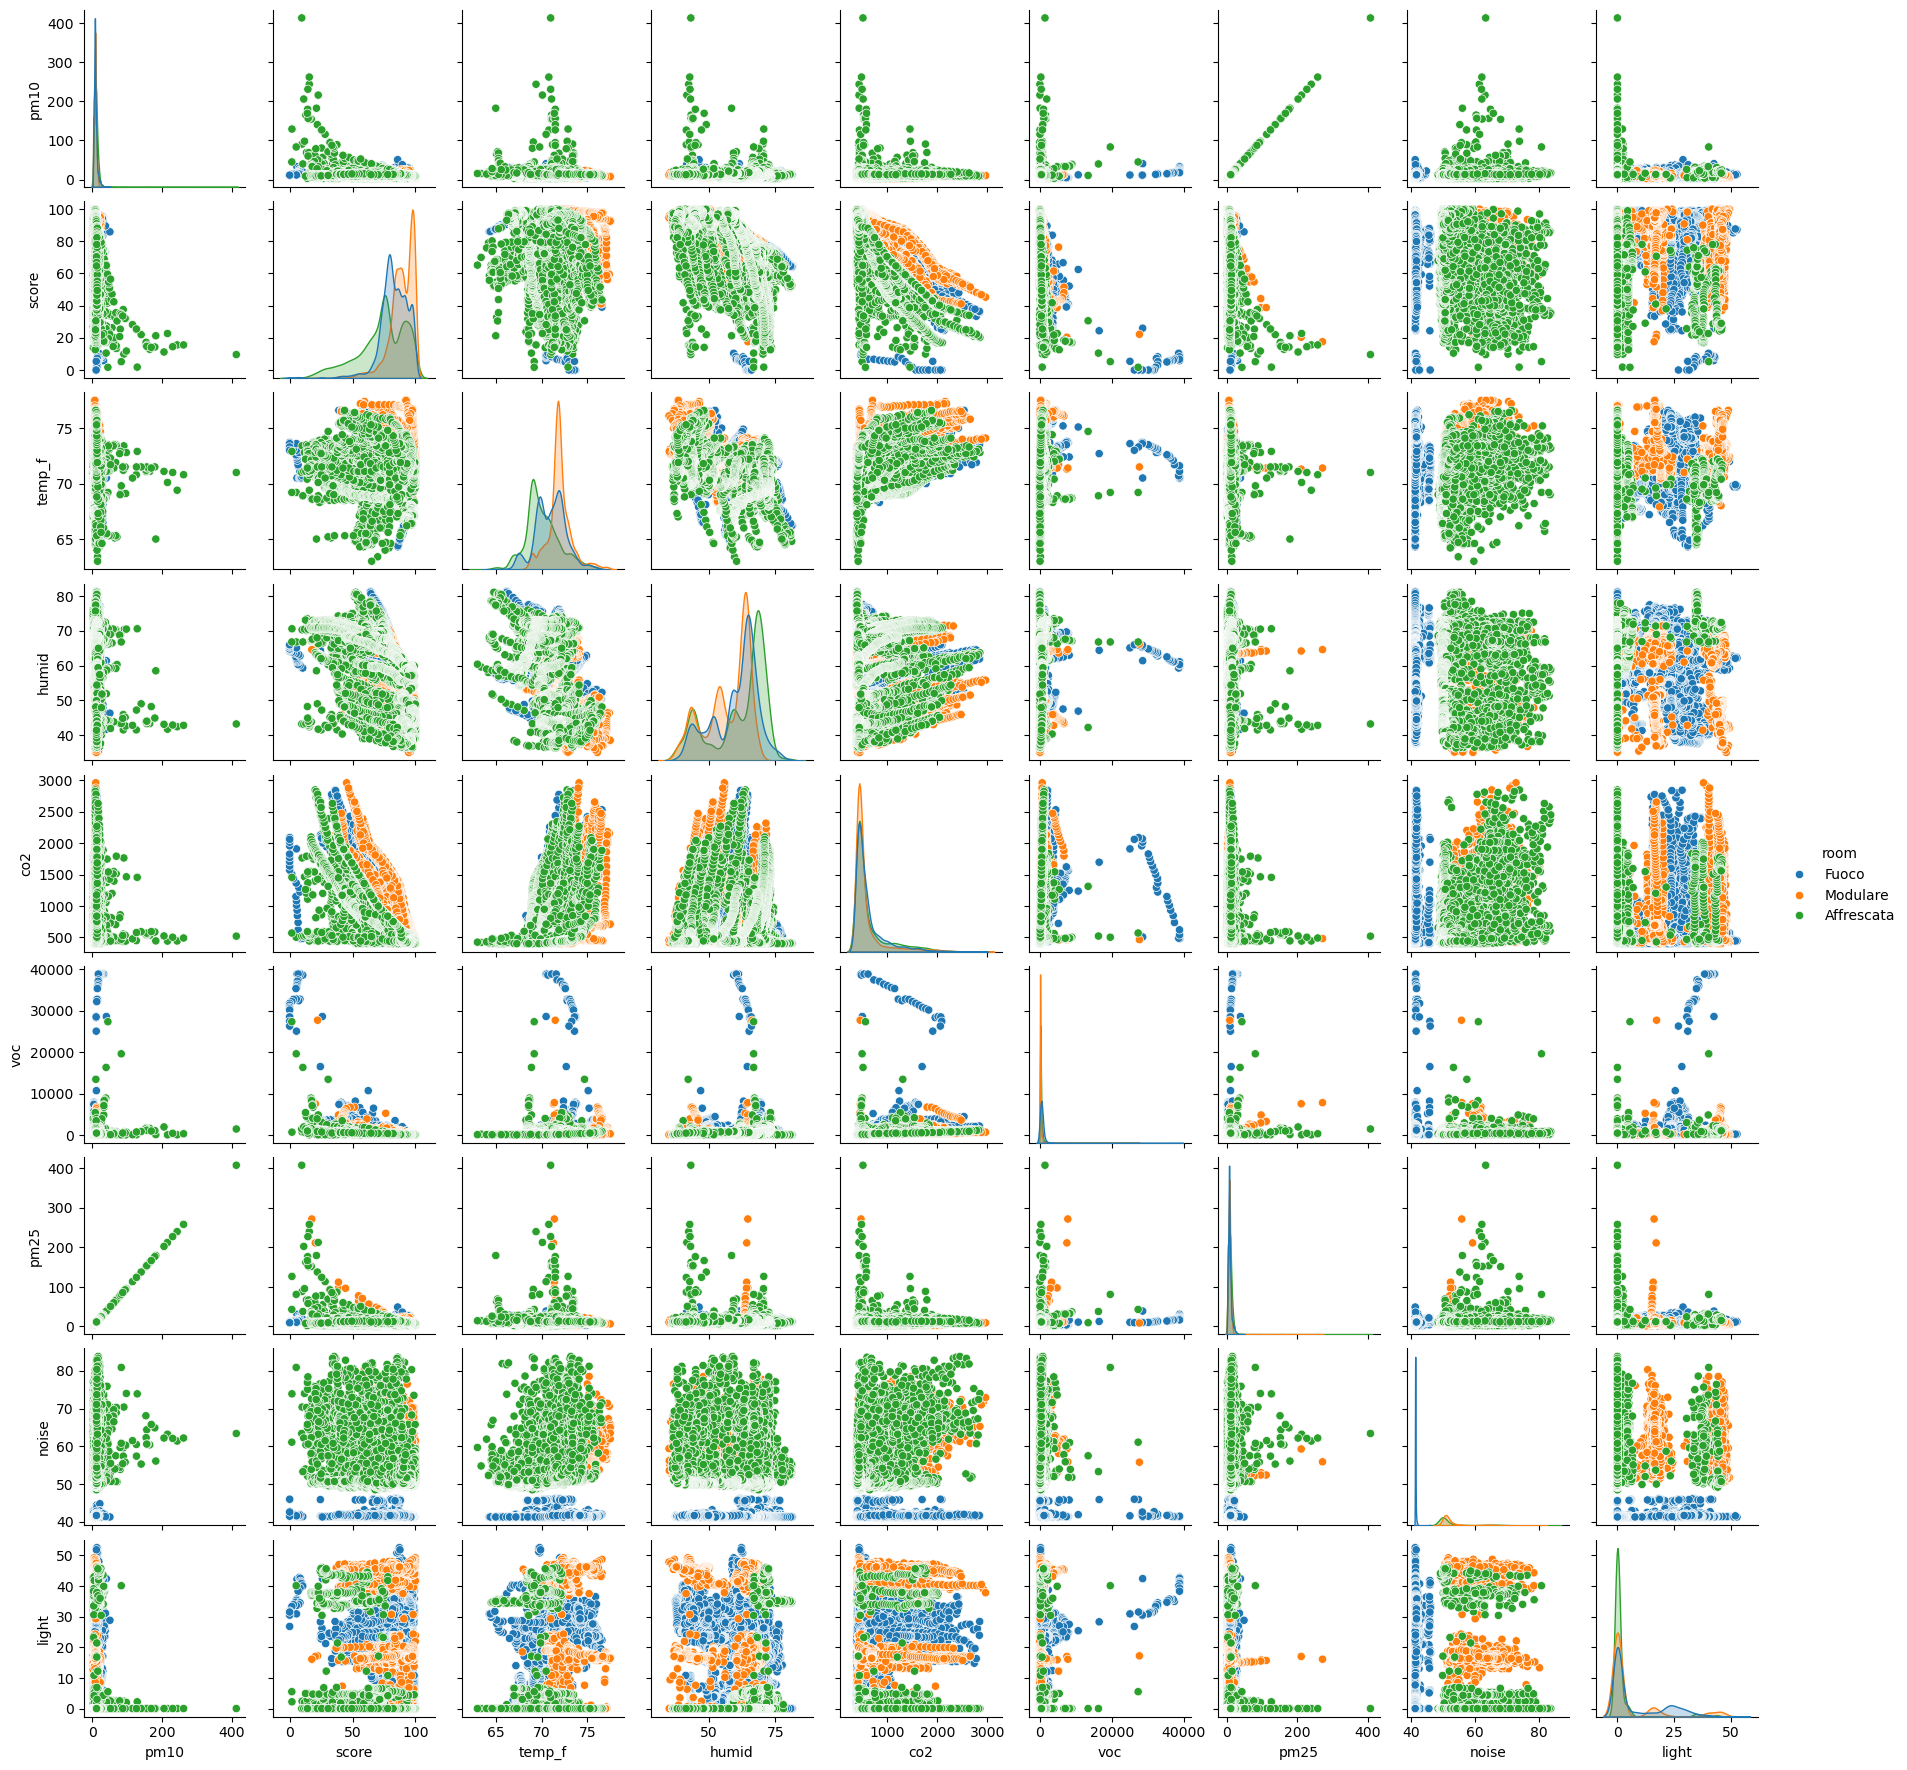

In [21]:
sns.pairplot(data = df[variables + ['room']], height = 2, hue = 'room')

## Summary
* The main variables that affect the air quality score are CO2 and humid.
* The score is relatively influenced by voc, noise, pm25 and pm10.
* Wednesdays and noon is the time with the lowest air quality score.
* Affrescata is the aula with the lowest air quality, where humid is the variable that is consistently higher in comparison to the other two aulas.